In this notebook we compute the entropy of the trajectories in the phase space. We first define a grid, that can contain all trajectory data per all different values of betas. 


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
from scipy.stats import entropy
sys.path.append('../')

from src.utils import load_data

DATA_DIR = '../data'
BETA_VALUES = np.sort(
    [float(x.split('fermi_')[-1]) for x in os.listdir(DATA_DIR) if x.startswith('fermi')])

print('Beta values:',len(BETA_VALUES))

Beta values: 30


Find grid: for each trajectory data, compute min and max along time steps. Then aggregate along q,p 

In [14]:
mins_grid, maxs_grid = np.zeros(64) + 1e10, np.zeros(64) + 1e10 * -1
for beta in tqdm(BETA_VALUES):
    data = load_data(DATA_DIR, beta)

    X = data.data_matrix
    
    mins_grid = np.minimum(X.min(axis=0), mins_grid)
    maxs_grid = np.maximum(X.max(axis=0), maxs_grid)

100%|██████████| 30/30 [00:14<00:00,  2.02it/s]


In [25]:
# create parameters grid

num_bins = 1000

param_grid = []
for i in range(64):
    param_grid.append(np.linspace(mins_grid[i], maxs_grid[i], num_bins))

In [32]:
def discretize_and_compute_entropy(trajectory_data, grid):
    num_timesteps, num_params = trajectory_data.shape    

    entropies = []
    for dim_index in range(num_params):

        param_grid = grid[dim_index]
        num_bins = len(param_grid)
        
        # Discretize the trajectory dimension
        discretized_data = np.digitize(trajectory_data[:, dim_index], bins=param_grid, right=True)
        
        histogram, _ = np.histogram(discretized_data, bins=range(1, num_bins + 2))

        # Normalize histogram to obtain a probability distribution
        probability = histogram / np.sum(histogram)

        # Compute entropy for the parameter
        entropies.append(entropy(probability))

    return np.sum(entropies)


beta_entropies = []
for beta in BETA_VALUES:
    data = load_data(DATA_DIR, beta)

    X = data.data_matrix
    
    e = discretize_and_compute_entropy(X, param_grid)
    beta_entropies.append(e)
    print(beta, e)

0.1 382.72753445821354
0.2 391.30350785055725
0.3 398.766792714517
0.4 402.4860107863931
0.5 404.40889247748
0.6 405.35037477422213
0.7 405.7876678417306
0.8 405.96216899274253
0.9 406.12895102832726
1.0 406.2787590523533
1.1 406.51272159512627
1.2 405.49621903773937
1.3 406.82916793940336
1.4 406.90246272056277
1.5 407.03829147444566
1.6 407.2443810276017
1.7 405.0924729786119
1.8 405.5851400172784
1.9 399.3174909442831
2.0 401.5586350725159
2.1 396.1571065093567
2.2 395.4698633035331
2.3 401.88377776993013
2.4 394.8766334812485
2.5 396.30669093378833
2.6 393.25427861031505
2.7 393.3261882886809
2.8 389.7920036654093
2.9 392.80834667992804
3.0 393.3339140415591


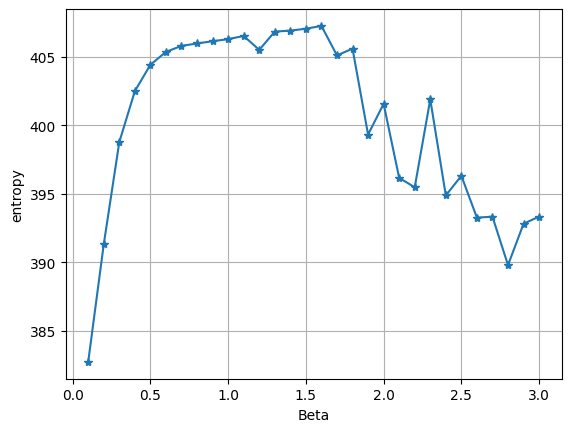

In [33]:
plt.plot(BETA_VALUES, beta_entropies, '*-')
plt.xlabel('Beta')
plt.ylabel('entropy')
plt.grid()